In [1]:
# cargar las librerias y modulos necesarios
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [2]:
#print(type(load_diabetes))

# print(load_diabetes.__dir__())
# print(load_diabetes.__str__)

In [3]:
# datos = load_diabetes(as_frame=True)
datos = load_diabetes(as_frame=True)
print(datos.__dir__())
#print(datos.DESCR)
print(datos.feature_names)

display(datos.data.head())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


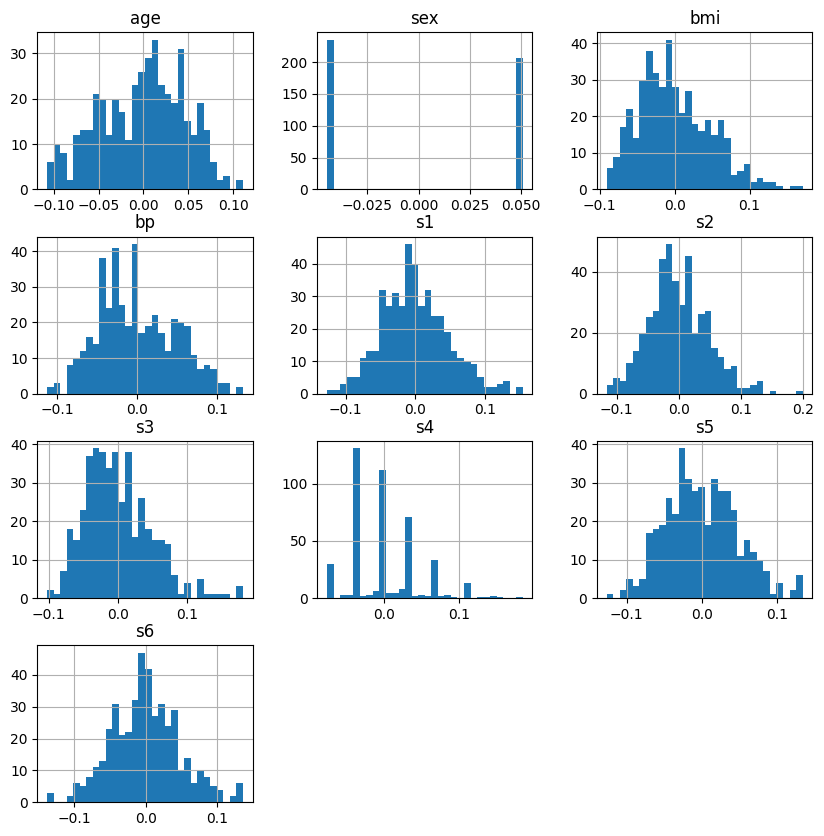

In [4]:
# un primer vistazo a los datos
datos.data.hist(bins= 30,
                figsize= (10, 10))
plt.show()

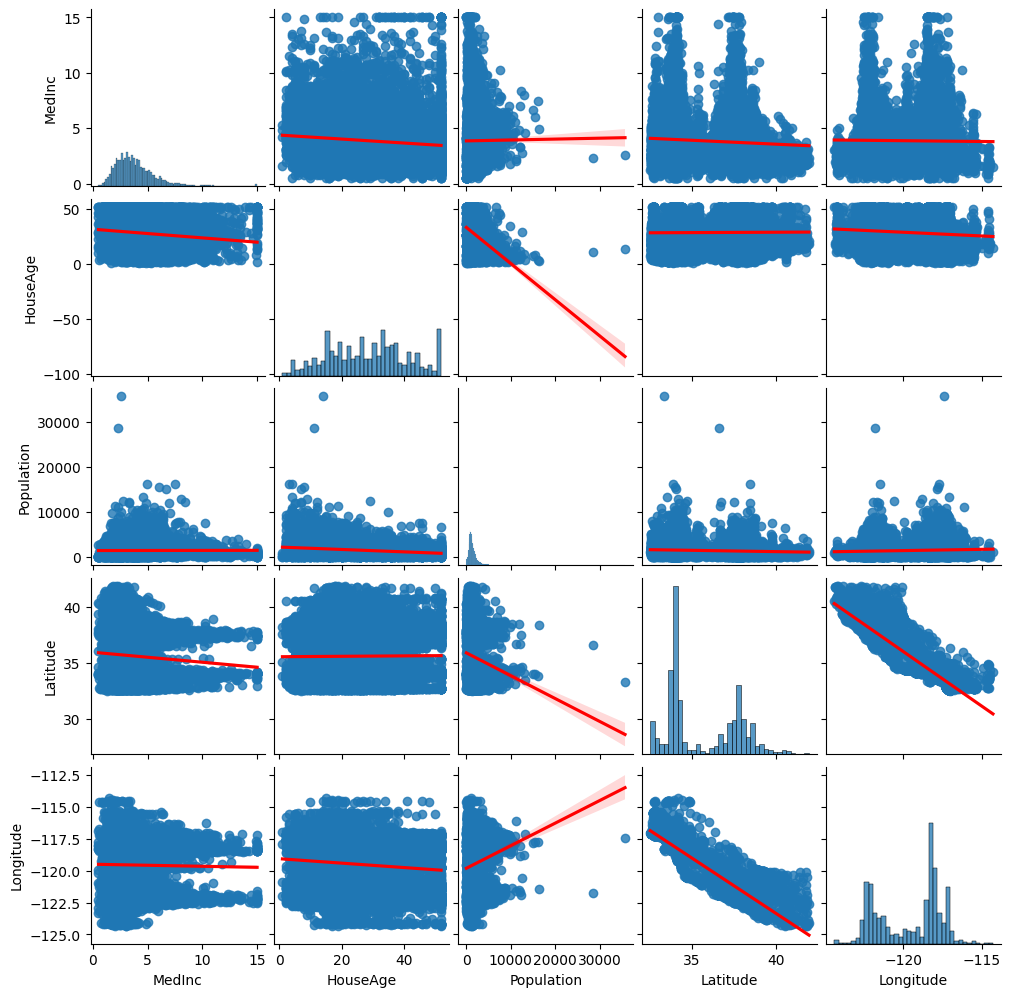

In [8]:
import seaborn as sns

# cols = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

cols = ['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude']
#plt.figure(figsize= (12,12))
g = sns.pairplot(datos.data[cols],
                 #diag_kind='kde',
                 kind = 'reg', 
                 #diag_kws=dict(shade=True), 
                 plot_kws={'line_kws': {'color':'red'}})

g.fig.set_size_inches(10,10)

plt.show()

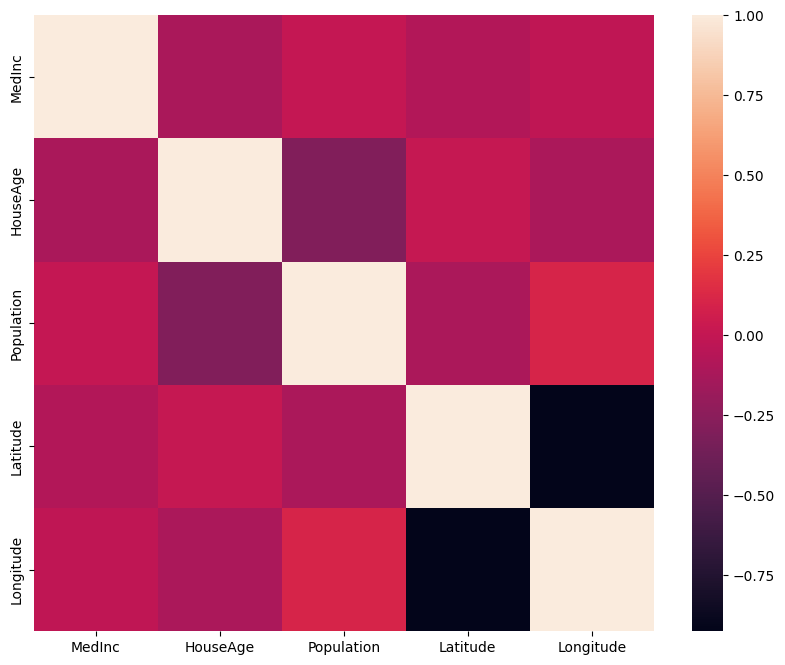

In [9]:
corr = datos.data[cols].corr()

plt.figure(figsize= (10,8))
g = sns.heatmap(corr,
            )
#g.fig.set_size_inches(10,10)

plt.show()

In [5]:
# extraer x e y, y separar el datos de test y entrenamiento
X = datos.data
y = datos.target

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True, random_state= 42)

print('\n')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(442, 10)
(442,)


(353, 10)
(89, 10)
(353,)
(89,)


In [6]:
# definimos las métricas de evaluacion
from math import sqrt
from sklearn import metrics


metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',
  }

In [14]:
# escalando los datas de entrenamiento

standarizador = StandardScaler()
X_train_scaled = pd.DataFrame(data= standarizador.fit_transform(X_train), columns= datos.data.columns)

In [15]:
# creando el modelo

lin_reg = LinearRegression(fit_intercept=True) # create

In [16]:
cross_val_results = cross_validate(lin_reg, 
                                   X_train_scaled,
                                   y_train,
                                   cv = KFold(n_splits=5, shuffle= True, random_state=42),
                                   scoring= metricas)

print(cross_val_results.keys(), '\n')

for metrica, resultados in cross_val_results.items():
    print('Para la métrica: \t{} \t se han obtenido de media los siguientes resultados \t ---> \t{}'.format(metrica, round(resultados.mean(), 4)))

dict_keys(['fit_time', 'score_time', 'test_MAE', 'test_RMSE', 'test_MAPE', 'test_R2']) 

Para la métrica: 	fit_time 	 se han obtenido de media los siguientes resultados 	 ---> 	0.0021
Para la métrica: 	score_time 	 se han obtenido de media los siguientes resultados 	 ---> 	0.003
Para la métrica: 	test_MAE 	 se han obtenido de media los siguientes resultados 	 ---> 	-45.0482
Para la métrica: 	test_RMSE 	 se han obtenido de media los siguientes resultados 	 ---> 	-55.3946
Para la métrica: 	test_MAPE 	 se han obtenido de media los siguientes resultados 	 ---> 	-40.1513
Para la métrica: 	test_R2 	 se han obtenido de media los siguientes resultados 	 ---> 	0.4804


In [17]:
model = lin_reg.fit(X_train_scaled, y_train)

print('Model coeficents: \t', model.coef_)
print(type(model.coef_))
print('Models bias term: \t', model.intercept_ )

Model coeficents: 	 [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
<class 'numpy.ndarray'>
Models bias term: 	 153.73654390934846


In [18]:
coefs = list(model.coef_)
# print(coefs)
feature_names = list(model.feature_names_in_)
# print(feature_names)

feature_and_coefs = dict(zip(feature_names, coefs))
n = 1

for feature, coef in feature_and_coefs.items():
    print(f'The coeficent w{n},\t refering to {feature},\t has the value:\t {coef}')
    n += 1 

The coeficent w1,	 refering to age,	 has the value:	 1.7537579919417545
The coeficent w2,	 refering to sex,	 has the value:	 -11.5118090815466
The coeficent w3,	 refering to bmi,	 has the value:	 25.60712143899749
The coeficent w4,	 refering to bp,	 has the value:	 16.828871666252763
The coeficent w5,	 refering to s1,	 has the value:	 -44.44885564253612
The coeficent w6,	 refering to s2,	 has the value:	 24.640953560447652
The coeficent w7,	 refering to s3,	 has the value:	 7.676977684866794
The coeficent w8,	 refering to s4,	 has the value:	 13.138783899963524
The coeficent w9,	 refering to s5,	 has the value:	 35.16119521092074
The coeficent w10,	 refering to s6,	 has the value:	 2.351363651024438


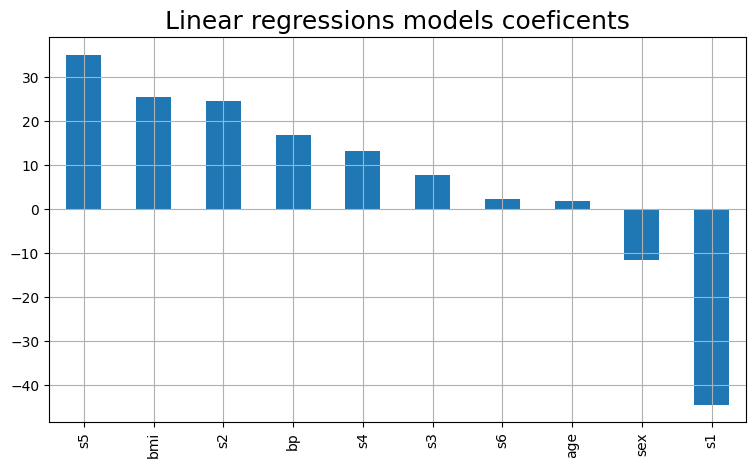

In [36]:
pd.Series(model.coef_, index= model.feature_names_in_).sort_values(ascending=False).plot(kind= 'bar', figsize= (9,5))
plt.title('Linear regressions models coeficents', fontdict= {'fontsize': 18})
plt.grid()
plt.show()

In [21]:
# prediccion
# estandarizamos los datos con el estandarizador entrenado en el x_train
X_test_scaled = pd.DataFrame(data= standarizador.transform(X_test), columns=datos.data.columns)

In [22]:
y_pred_test = model.predict(X_test_scaled)

In [23]:
MAE = metrics.mean_absolute_error(y_test, y_pred_test)
MSE = metrics.mean_squared_error(y_test, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred_test)
R2 = metrics.r2_score(y_test, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  42.7941
MSE: 2900.1936
RMSE: 53.8534
MAPE: 0.3750
R2:   0.4526


In [24]:
model.score(X_test_scaled, y_test)

0.45260276297191915

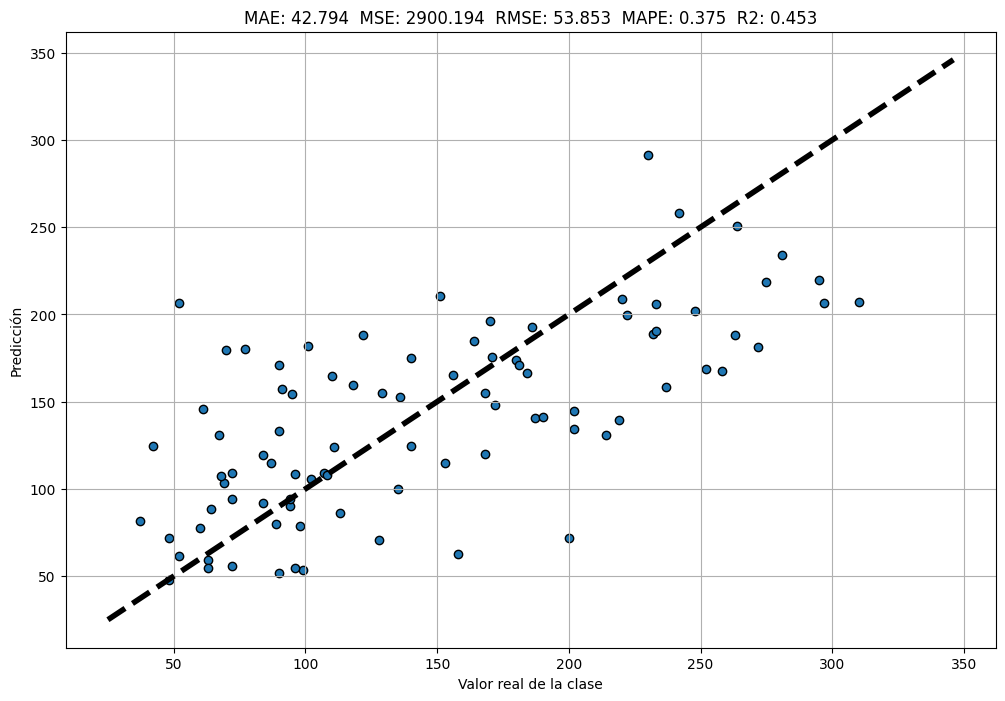

In [25]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.scatter(y_test, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
          (MAE,MSE,RMSE,MAPE,R2))
plt.grid()
plt.show()

In [26]:
print(X_train.shape)

(353, 10)


In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elas = ElasticNet(fit_intercept= True)

h_params = {'l1_ratio': [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1],
            'alpha': [0.01, 0.1, 1, 10, 100]}

GS_elas = GridSearchCV(estimator= elas,
                       param_grid=h_params,
                       scoring= 'r2', 
                       cv = KFold(n_splits=5, shuffle= True, random_state=42),
                       n_jobs= -1)

In [38]:
GS_elas.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]},
             scoring='r2')

In [39]:
best_elastic_net= GS_elas.best_estimator_
print(GS_elas.best_estimator_)
print(GS_elas.best_score_)

ElasticNet(alpha=0.1, l1_ratio=1)
0.48117973802896286


In [40]:
from sklearn.metrics import r2_score

In [41]:
y_pred_elas = best_elastic_net.predict(X_test_scaled)

r2_score(y_test, y_pred_elas)

0.45554139902790414

In [47]:
print(best_elastic_net.coef_)

[  1.73045056 -11.31635911  25.82462699  16.64425156 -29.35841191
  13.27584411   0.5479479   10.23616805  29.63282611   2.39347521]


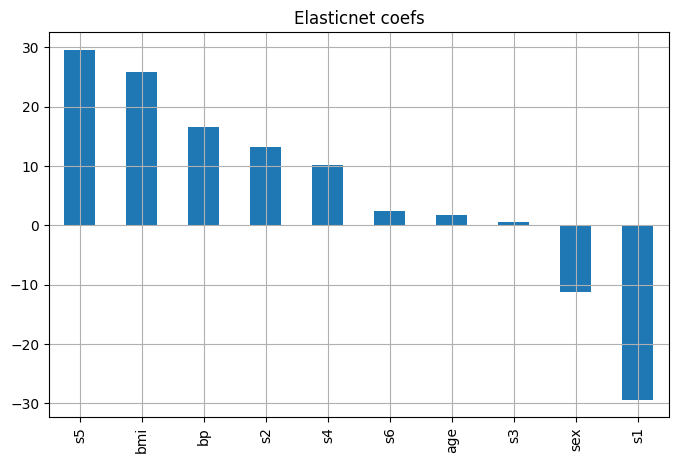

In [44]:
pd.Series(best_elastic_net.coef_, index= datos.data.columns).sort_values(ascending=False).plot(kind= 'bar', figsize= (8,5), grid= True)
plt.title('Elasticnet coefs')

plt.show()

Text(0.5, 1.0, 'Linear regressions coeficents')

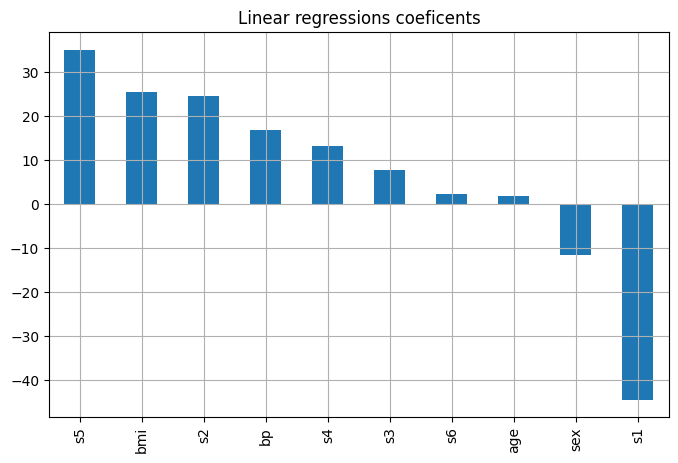

In [46]:
pd.Series(model.coef_, index= model.feature_names_in_).sort_values(ascending=False).plot(kind= 'bar', figsize= (8,5), grid= True)
plt.title('Linear regressions coeficents')
